### Importing Necessary Libraries

In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os 
import sys

## Importing the CSV file

In [61]:
file = pd.read_csv("insurance.csv")
file.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning 

In [62]:
# take information about the data 
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
# describe the data
file.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [64]:
# check for the  missing values
file.isnull().sum()

# since there is no single missing value in the data, we can proceed to the next step,
# to remove the null values, we write the code below
#file.dropna(inplace=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
# check for the duplicate values
file.duplicated().sum()

# print the duplicate values
file[file.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [66]:
# drop duplicates
file.drop_duplicates(inplace=True)

# check for the duplicate values again
file.duplicated().sum()

0

## Exploratory data Analysis

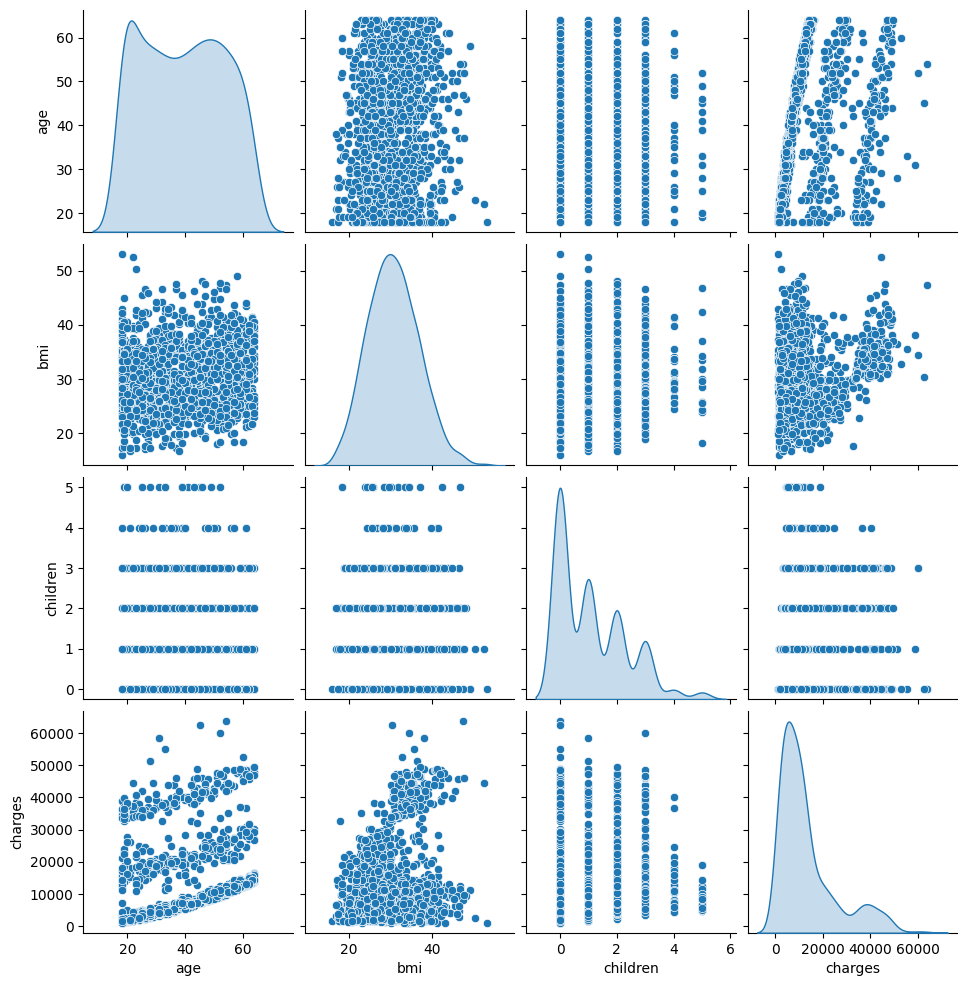

In [67]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(file, diag_kind='kde')
plt.show()

### Plot Description
### Insights from Pair Plot
- **Correlation Indicators**: The scatter plots show how each pair of variables correlates with each other.
  - The 'age' and 'bmi' scatter plot does not show a clear correlation, suggesting these two variables do not have a strong linear relationship.
  - The scatter plots involving the 'children' variable show discrete bands due to the nature of the 'children' variable being a count that likely represents discrete numbers of children.

### Correlation Strength
- **Age vs. BMI**: There's no apparent pattern indicating any significant correlation between age and BMI.
- **Age vs. Children**: The distinct horizontal lines at integer values of children indicate that there is no continuous relationship between age and the number of children; instead, it shows that these are discrete categories.
- **BMI vs. Children**: Similar to 'age vs. children', the scatter plot shows horizontal lines of data points, consistent with the 'children' variable representing discrete categories.

### Data Distributions
- The density plots (on the diagonal) show that 'age' and 'bmi' are roughly normally distributed, while 'children' is positively skewed, with a peak at 0.

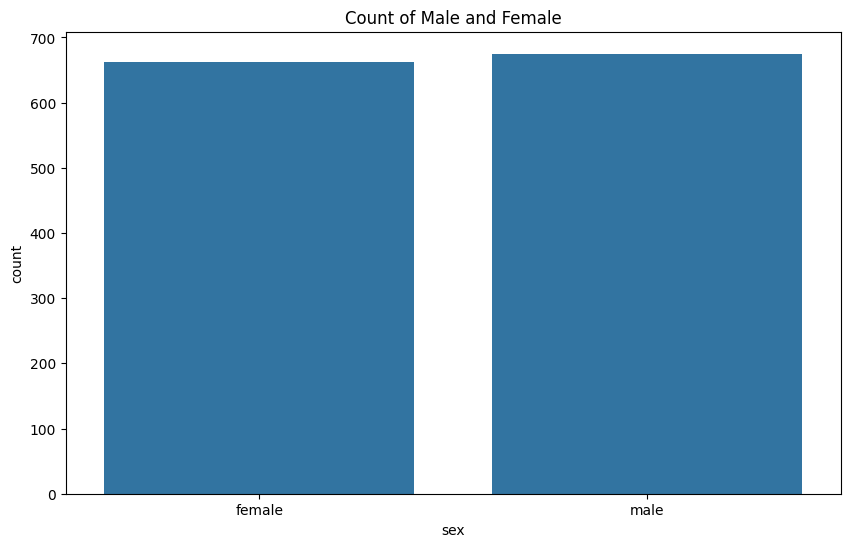

In [68]:
# Countplot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=file, x='sex')
plt.title('Count of Male and Female')
plt.show()

### We can See that the distributions of the Gender are Almost same, SO there is negligible Class Imbalance

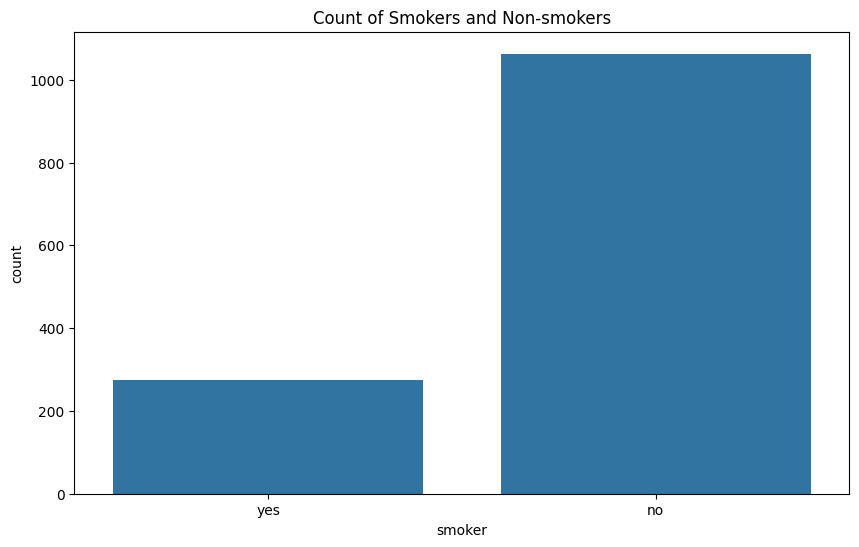

In [69]:
# Count of Smokers and Non-smokers
plt.figure(figsize=(10, 6))
sns.countplot(data=file, x='smoker')
plt.title('Count of Smokers and Non-smokers')
plt.show()

### However, in our Dataset, the count of  Non Smokers are way more than the count of Smokers

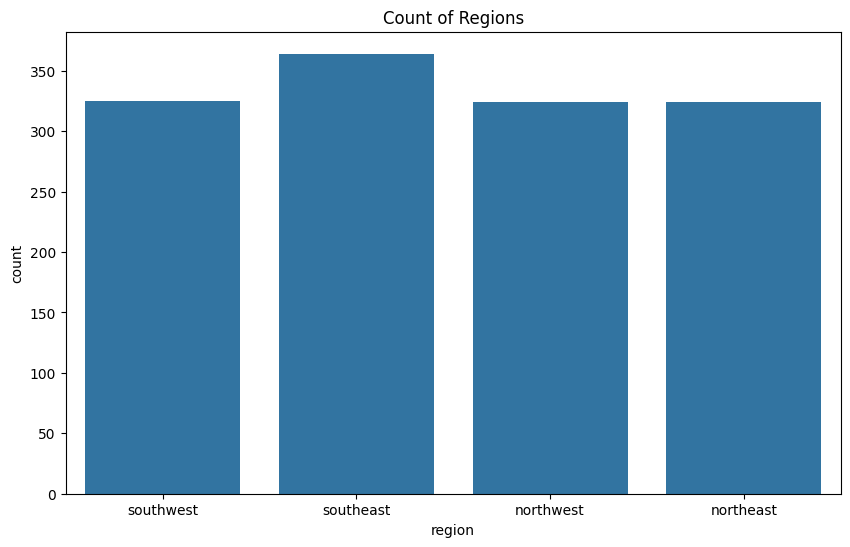

In [70]:
# Count of Regions

plt.figure(figsize=(10, 6))
sns.countplot(data=file, x='region')
plt.title('Count of Regions')
plt.show()

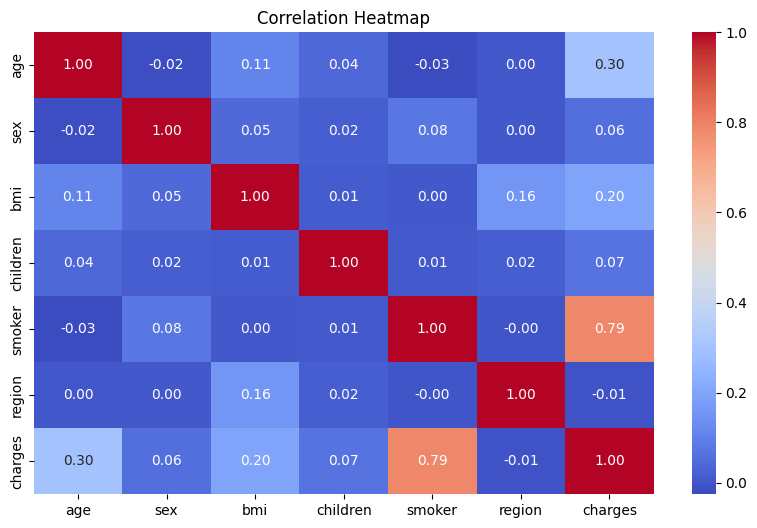

In [71]:
from sklearn.preprocessing import LabelEncoder

# Convert 'sex' column to numerical using label encoding
sex_label_encoder = LabelEncoder()
file['sex'] = sex_label_encoder.fit_transform(file['sex'])

# Convert 'smoker' column to numerical using label encoding
smoker_label_encoder = LabelEncoder()
file['smoker'] = smoker_label_encoder.fit_transform(file['smoker'])

# Convert 'region' column to numerical using label encoding
region_label_encoder = LabelEncoder()
file['region'] = region_label_encoder.fit_transform(file['region'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(file.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Heatmap Analysis
- **Variables Included**: The heatmap includes variables such as 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'.
- **Correlation Coefficients**: Each cell in the heatmap represents the correlation coefficient between the variables on the x-axis and y-axis.
  - Coefficients close to +1 indicate a strong positive correlation.
  - Coefficients close to -1 indicate a strong negative correlation.
  - Coefficients around 0 suggest no linear correlation.

### Insights from Heatmap
- **Strong Positive Correlation**: There is a notably strong positive correlation of 0.79 between 'smoker' and 'charges', suggesting that smokers tend to have higher charges.
- **Moderate Positive Correlation**: 'age' and 'charges' show a moderate positive correlation of 0.30, indicating that as age increases, charges tend to increase as well, but not as strongly as smoking does.
- **Weak Correlations**: 'bmi' has a weak positive correlation with 'charges' at 0.20, and the rest of the variables show very weak to no correlation with each other, as their values are close to 0.
- **No Correlation**: The correlation between 'sex' and 'children' and almost all other variables is very weak, close to 0, suggesting no linear relationship.

### Interpretation
- **Risk Factors**: The variables with higher correlations to 'charges' are likely to be important predictors in a model aiming to estimate charges. In this case, 'smoker' status appears to be the most significant predictor.
- **Health Indicators**: 'bmi' and 'age' are also predictors of charges but to a lesser extent.
- **Sex and Region**: 'sex' and 'region' do not seem to have a strong influence on the charges based on this correlation heatmap.

## Feature Selection and feature engineering

In [72]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define features and target variable
X = file.drop('charges', axis=1)  # X contains all columns except 'charges'
y = file['charges']  # y contains only the 'charges' column

# Feature Selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k=3)  # Select top 3 features
X_selected = selector.fit_transform(X, y)  # Apply feature selection to X
selected_features = X.columns[selector.get_support()]  # Get the names of selected features

# Print selected features
print("Selected features:", selected_features)

Selected features: Index(['age', 'bmi', 'smoker'], dtype='object')


### The Most influential Independent Variables are AGE, BMI, SMOKER/NONSMOKER.
#### It means that these variables have significant contribution in predicting the Y variable

## Train Test Split

In [73]:
# now that we have selected the features, we can proceed to the next step, which is to split the data into training and testing sets
# but before that, we need to scale the data using the MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Scale the data using MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [74]:
# check the shape of the training and testing sets
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)

X_train_scaled shape: (1069, 6)
X_test_scaled shape: (268, 6)


## Model Building

In [75]:
# now that we have scaled the data, we can proceed to the next step, which is to build the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train MSE: 35403275.585444584
Test MSE: 41607776.51148496
Train R^2: 0.7487799749798774
Test R^2: 0.7526726290709553


### Model 2, with 3 best features 

In [76]:
# build a model using best 3 features
# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=0)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [77]:
# Create a Linear Regression model
model2 = LinearRegression()

model2.fit(X_train_scaled, y_train)# Train the model

train_predictions = model2.predict(X_train_scaled) # Make predictions

test_predictions = model2.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, train_predictions) # Evaluate the model

test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions) # Print the evaluation metrics

test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics

print("Train MSE (3 features):", train_mse)

print("Test MSE (3 features):", test_mse)

print("Train R^2 (3 features):", train_r2)

print("Test R^2 (3 features):", test_r2)

Train MSE (3 features): 35924307.823114336
Test MSE (3 features): 41920497.36727977
Train R^2 (3 features): 0.7450827540414425
Test R^2 (3 features): 0.7508137355278923


## Model 3 with Hyperparameter Tuning

In [78]:
# Except MinMaxScaler, we can also use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [79]:
# Perform some Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {
    'fit_intercept': [True, False], # Whether to calculate the intercept for this model
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)

# Perform hyperparameter tuning
grid_search.fit(X_train_scaled2, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'fit_intercept': True}


In [80]:
# Create a Linear Regression model with the best hyperparameters
model3 = LinearRegression(**best_params)

# Train the model
model3.fit(X_train_scaled2, y_train)

# Make predictions
train_predictions = model3.predict(X_train_scaled2)
test_predictions = model3.predict(X_test_scaled2)

# Evaluate the model
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print("Train MSE (best hyperparameters):", train_mse)
print("Test MSE (best hyperparameters):", test_mse)
print("Train R^2 (best hyperparameters):", train_r2)
print("Test R^2 (best hyperparameters):", test_r2)

Train MSE (best hyperparameters): 35403275.585444584
Test MSE (best hyperparameters): 41607776.51148495
Train R^2 (best hyperparameters): 0.7487799749798774
Test R^2 (best hyperparameters): 0.7526726290709553


## Checking the Model Performance on Different Evaluation Metrics

In [82]:
# Evaluate model 1
train_mse_model1 = mean_squared_error(y_train, train_predictions)
test_mse_model1 = mean_squared_error(y_test, test_predictions)
train_r2_model1 = r2_score(y_train, train_predictions)
test_r2_model1 = r2_score(y_test, test_predictions)

# Evaluate model 2
train_predictions_model2 = model2.predict(X_train_scaled)
test_predictions_model2 = model2.predict(X_test_scaled)
train_mse_model2 = mean_squared_error(y_train, train_predictions_model2)
test_mse_model2 = mean_squared_error(y_test, test_predictions_model2)
train_r2_model2 = r2_score(y_train, train_predictions_model2)
test_r2_model2 = r2_score(y_test, test_predictions_model2)

# Evaluate model 3
train_predictions_model3 = model3.predict(X_train_scaled2)
test_predictions_model3 = model3.predict(X_test_scaled2)
train_mse_model3 = mean_squared_error(y_train, train_predictions_model3)
test_mse_model3 = mean_squared_error(y_test, test_predictions_model3)
train_r2_model3 = r2_score(y_train, train_predictions_model3)
test_r2_model3 = r2_score(y_test, test_predictions_model3)

# Print the evaluation metrics for each model
print("Model 1:")
print("Train MSE:", train_mse_model1)
print("Test MSE:", test_mse_model1)
print("Train R^2:", train_r2_model1)
print("Test R^2:", test_r2_model1)

print("Model 2:")
print("Train MSE:", train_mse_model2)
print("Test MSE:", test_mse_model2)
print("Train R^2:", train_r2_model2)
print("Test R^2:", test_r2_model2)

print("Model 3:")
print("Train MSE:", train_mse_model3)
print("Test MSE:", test_mse_model3)
print("Train R^2:", train_r2_model3)
print("Test R^2:", test_r2_model3)

Model 1:
Train MSE: 35403275.585444584
Test MSE: 41607776.51148495
Train R^2: 0.7487799749798774
Test R^2: 0.7526726290709553
Model 2:
Train MSE: 35924307.823114336
Test MSE: 41920497.36727977
Train R^2: 0.7450827540414425
Test R^2: 0.7508137355278923
Model 3:
Train MSE: 35403275.585444584
Test MSE: 41607776.51148495
Train R^2: 0.7487799749798774
Test R^2: 0.7526726290709553


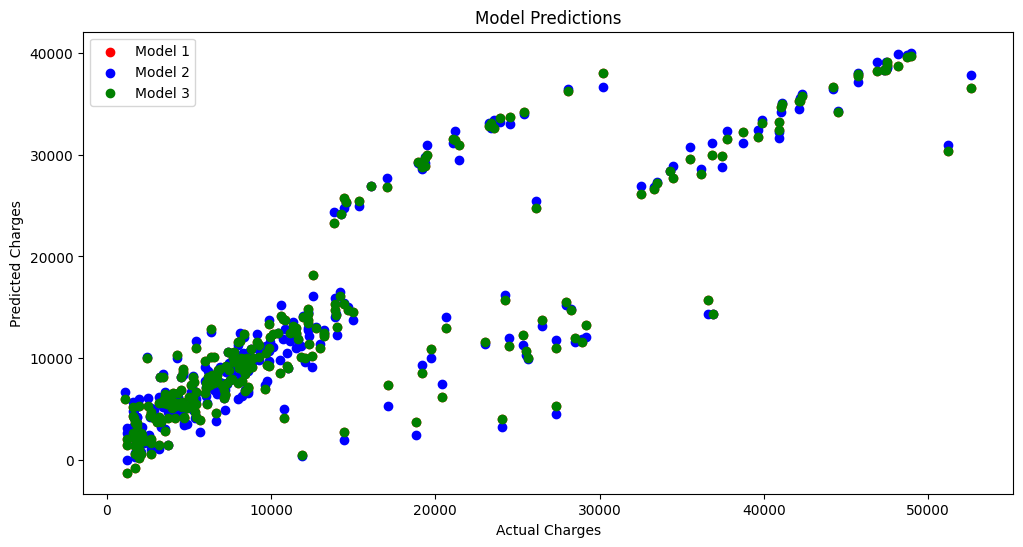

In [83]:
# visualize the predictions of all the models
plt.figure(figsize=(12, 6))
plt.scatter(y_test, test_predictions, color='red', label='Model 1')
plt.scatter(y_test, test_predictions_model2, color='blue', label='Model 2')
plt.scatter(y_test, test_predictions_model3, color='green', label='Model 3')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Model Predictions')
plt.legend()
plt.show()

### Plot Description
- The **x-axis** represents actual charges, which is the true amount that each observation was charged.
- The **y-axis** represents predicted charges, which is the amount each model predicted for the charges.
- There are three sets of data points, each represented by a different color:
  - Red represents predictions from Model 1.
  - Blue represents predictions from Model 2.
  - Green represents predictions from Model 3.

### Insights and Analysis
- **High Charges**: There is a noticeable pattern where all three models tend to cluster around certain values, especially in the higher charges. This could indicate a common feature or set of features in the dataset that all models are responding to similarly.
- **Low Charges**: For lower actual charges, the scatter is more pronounced for all models, which might suggest that this range is more difficult to predict accurately or that there are more varied factors influencing the charges that the models are not capturing.
- **Error Distribution**: If we assume the ideal prediction would fall along a diagonal line from the bottom left to the top right (where predicted equals actual), then the spread of points away from this line at any given x value represents the error in prediction. This spread seems to be least for Model 3, especially at higher charge values.

### Conclusion
- **Model 3** seems to be the best performer for higher charges.
- **Model 2** is competitive, especially for a wider range of charges, potentially making it more reliable across different scenarios.
- **Model 1** may need further tuning to improve its predictions, especially for higher charges.
